# Image Analyzer: CNNs

This dataset contains 16 samples of 99 different species of leaves. The images were converted to black and white binary. Using convolutional Neural Networks, or CNN, we will find the best method to recognize leaf species with high accuracy. CNN is a unique form of DNN that uses spacial correlations for faster processing. This is commonly used in self-driving cars which require fast image-recognition to make split second calculations and decisions.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skimage import measure

In [2]:
startTime=datetime.now()
train=pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
labelEncode=LabelEncoder().fit(train.species)
labels=labelEncode.transform(train.species)
classes=list(labelEncode.classes_)
train=train.drop(['species','id'],axis=1)

train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
train.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [4]:
print(*classes,sep='\n')

Acer_Capillipes
Acer_Circinatum
Acer_Mono
Acer_Opalus
Acer_Palmatum
Acer_Pictum
Acer_Platanoids
Acer_Rubrum
Acer_Rufinerve
Acer_Saccharinum
Alnus_Cordata
Alnus_Maximowiczii
Alnus_Rubra
Alnus_Sieboldiana
Alnus_Viridis
Arundinaria_Simonii
Betula_Austrosinensis
Betula_Pendula
Callicarpa_Bodinieri
Castanea_Sativa
Celtis_Koraiensis
Cercis_Siliquastrum
Cornus_Chinensis
Cornus_Controversa
Cornus_Macrophylla
Cotinus_Coggygria
Crataegus_Monogyna
Cytisus_Battandieri
Eucalyptus_Glaucescens
Eucalyptus_Neglecta
Eucalyptus_Urnigera
Fagus_Sylvatica
Ginkgo_Biloba
Ilex_Aquifolium
Ilex_Cornuta
Liquidambar_Styraciflua
Liriodendron_Tulipifera
Lithocarpus_Cleistocarpus
Lithocarpus_Edulis
Magnolia_Heptapeta
Magnolia_Salicifolia
Morus_Nigra
Olea_Europaea
Phildelphus
Populus_Adenopoda
Populus_Grandidentata
Populus_Nigra
Prunus_Avium
Prunus_X_Shmittii
Pterocarya_Stenoptera
Quercus_Afares
Quercus_Agrifolia
Quercus_Alnifolia
Quercus_Brantii
Quercus_Canariensis
Quercus_Castaneifolia
Quercus_Cerris
Quercus_Chrysol

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

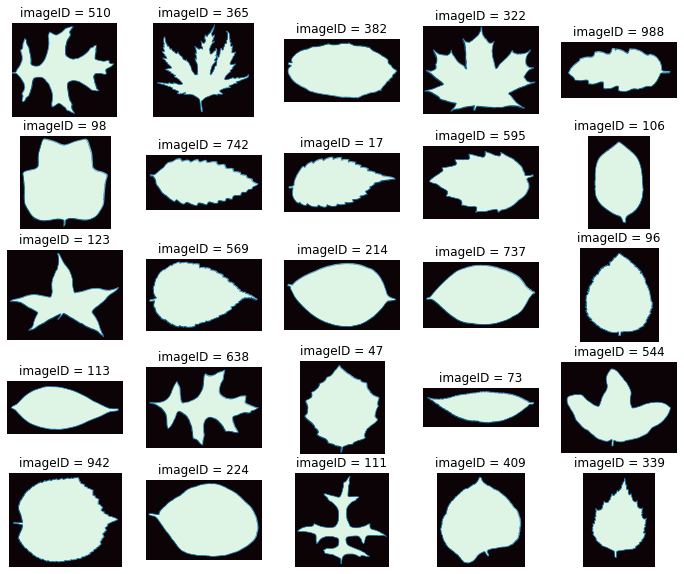

In [5]:
np.random.seed(123)
plt.figure(figsize=(12,10));
for k in range(25):
    randInd=str(np.random.randint(np.shape(train)[0]))
    plt.subplot(5,5,k+1)
    img=mpimg.imread('images/'+randInd+'.jpg')
    plt.imshow(img,cmap='mako')
    contours = measure.find_contours(img, .8)
    contour = max(contours, key=len)
    plt.plot(contour[::,1], contour[::,0], linewidth=0.5)
    plt.axis('off')
    plt.title('imageID = ' + randInd)
plt.tight_layout

In [6]:
np.random.seed(123)
sss = StratifiedShuffleSplit(100, test_size=0.2, random_state=123)
scaler=StandardScaler().fit(train.values)
sstrain=scaler.transform(train.values)
for i, j in sss.split(sstrain,labels):
    X_train, X_test = train.values[i], train.values[j]
    y_train, y_test = labels[i], labels[j]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GaussianNB()]
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("."*30)
    print(name)
    
    print('*Results*')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("."*30)

..............................
KNeighborsClassifier
*Results*
Accuracy: 87.3737%
Log Loss: 2.270354691956705
..............................
SVC
*Results*
Accuracy: 78.2828%
Log Loss: 4.695116047361693
..............................
DecisionTreeClassifier
*Results*
Accuracy: 65.6566%
Log Loss: 11.861801994211849
..............................
RandomForestClassifier
*Results*
Accuracy: 96.9697%
Log Loss: 0.7682309428960404
..............................
LogisticRegression
*Results*
Accuracy: 58.5859%
Log Loss: 4.1798223210975545
..............................
GaussianNB
*Results*
Accuracy: 54.5455%
Log Loss: 15.699443815868596
..............................


We normalize the data to avoid overfitting the model. We looked through 6 different methods to use CNN. The accuracy and log loss will be our guiding metrics for model determination. Log loss is used as a log scale of data loss when transforming the data. Higher values mean a higher scale of data loss rather than an exact number of how much data is lost.

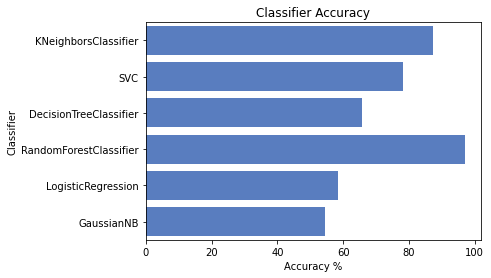

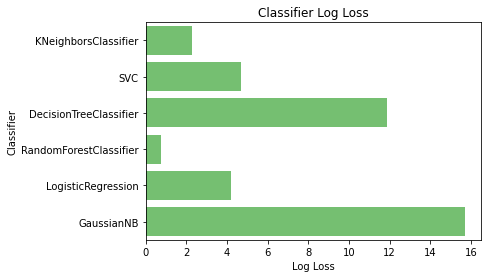

In [7]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

The Random Forest is the clear choice her. It has significanyly lower log loss than the other models and the accuracy is unmatched in this group.
Before running the final model, let's look at the ROC and precision-recall curves for each class.

ROC curves by classes with averaged ROC


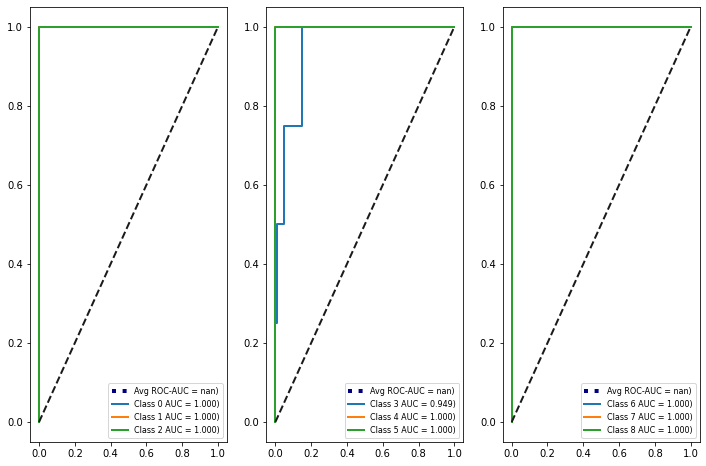

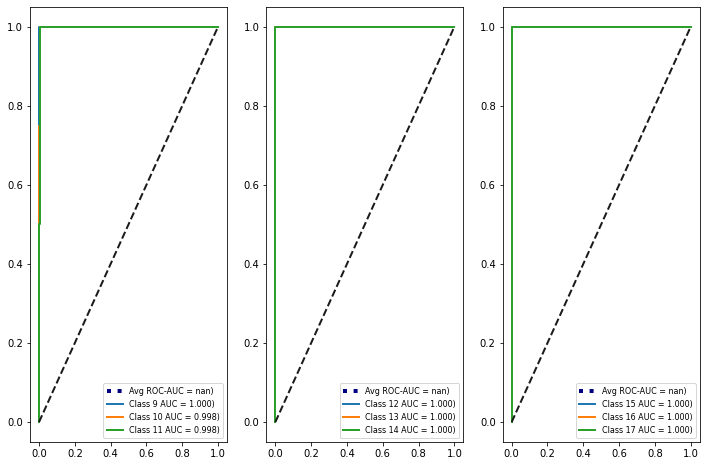

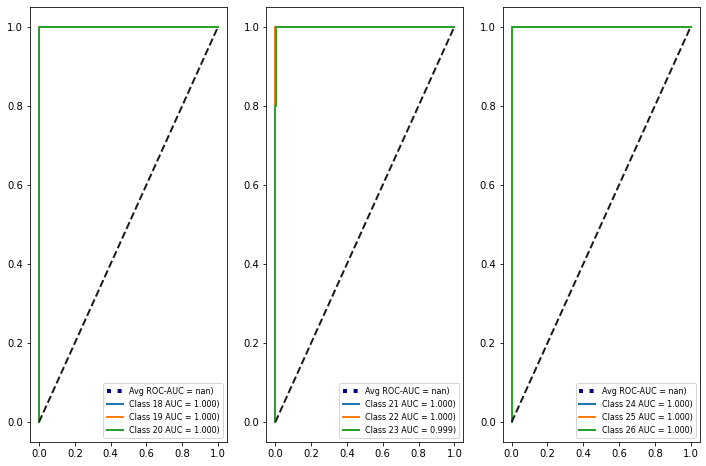

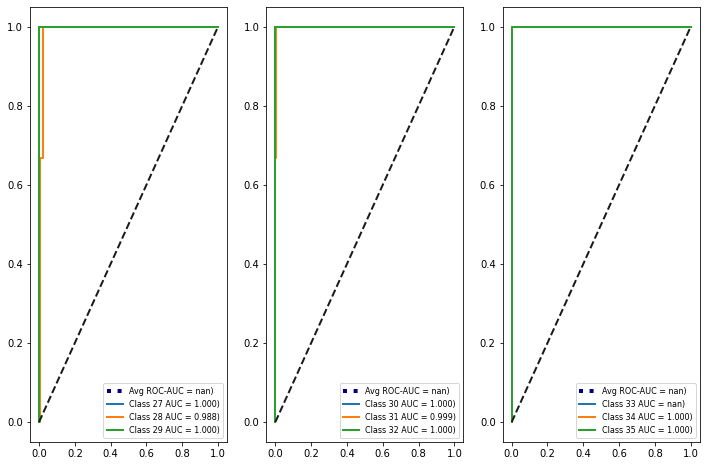

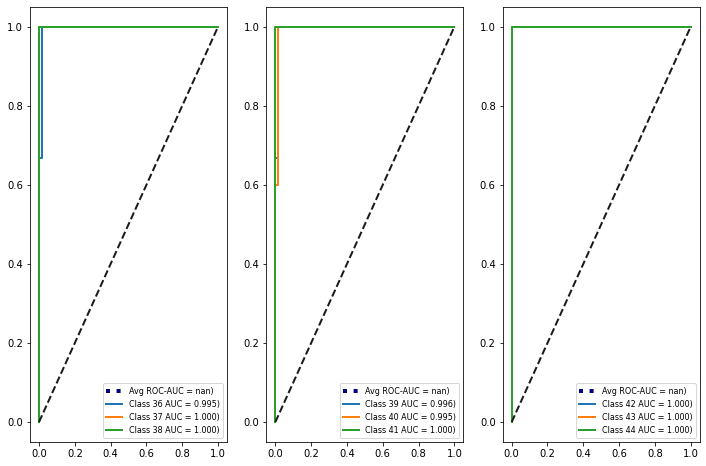

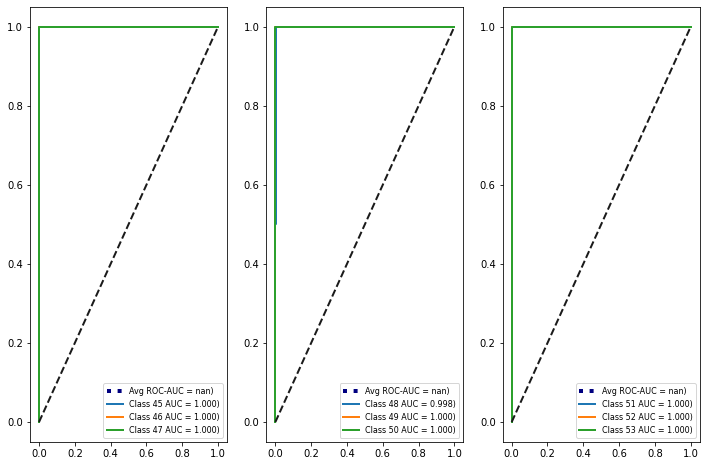

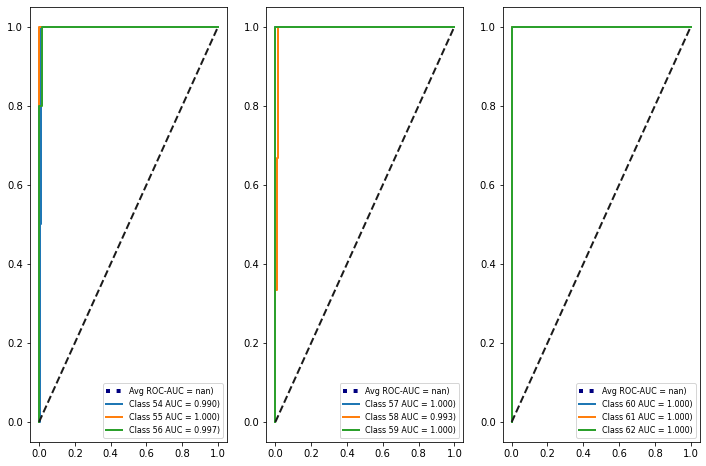

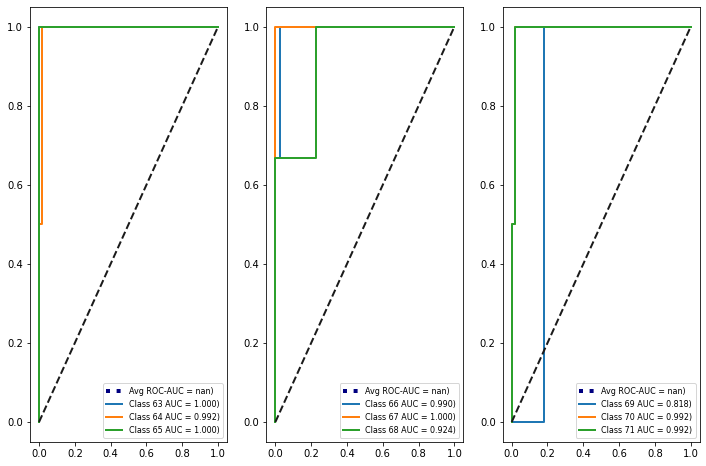

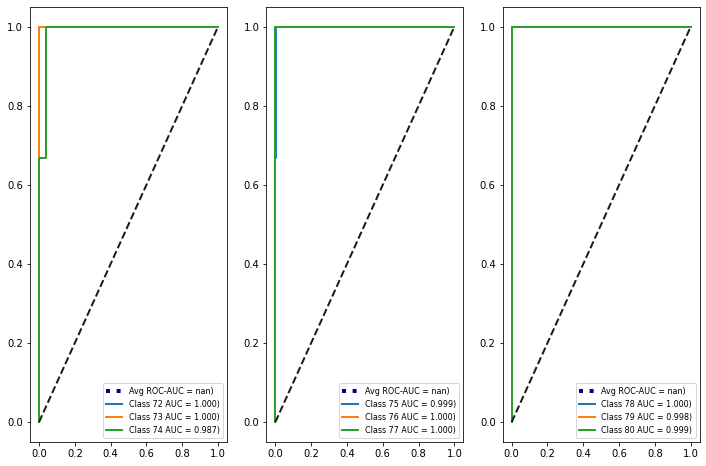

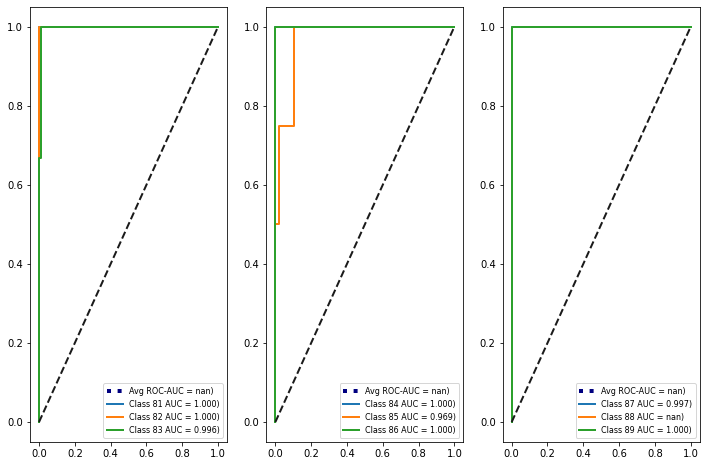

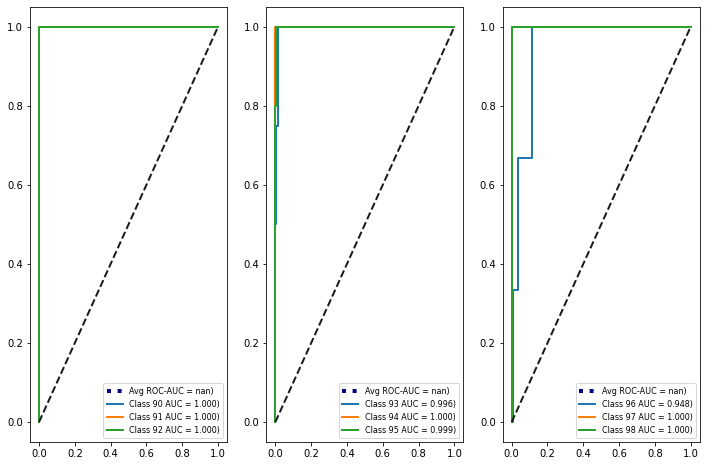

In [8]:
np.random.seed(123)

clf=OneVsRestClassifier(RandomForestClassifier(n_estimators=50,max_depth=3))

train=pd.read_csv('train.csv')
labelEncode=LabelEncoder().fit(train.species)
labels=labelEncode.transform(train.species)
classes=list(labelEncode.classes_)
n_classes=len(classes)
train=train.drop(['species','id'],axis=1)
Y = label_binarize(labels, classes=[*range((n_classes))])
X_train, X_test, y_train, y_test = train_test_split(train,Y, random_state = 123)

clf.fit(X_train,y_train)

y_score=clf.predict_proba(X_test)

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i], tpr[i],_=roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
colsn=3
rowsn=11
k=0
print('ROC curves by classes with averaged ROC')
for i in range(rowsn):
    fg, ax = plt.subplots(nrows=1, ncols=colsn,figsize=(12,8))
    for j in range(colsn):
        q=i*colsn+j+k
        ax[j].plot(fpr["macro"],tpr["macro"],
                   label="Avg ROC-AUC = %.3f)" %(roc_auc["macro"]),color="navy",
                   linestyle=":",linewidth=4)
        ax[j].plot(fpr[q],tpr[q],lw=lw,drawstyle='steps-mid',
                   label="Class %s AUC = %.3f)" % ((q), roc_auc[q]))
        ax[j].plot(fpr[q+1],tpr[q+1],lw=lw,drawstyle='steps-mid',
                   label="Class %s AUC = %.3f)" % ((q+1), roc_auc[q+1]))
        ax[j].plot(fpr[q+2],tpr[q+2],lw=lw,drawstyle='steps-mid',
                   label="Class %s AUC = %.3f)" % ((q+2), roc_auc[q+2]))
        ax[j].plot([0, 1], [0, 1], "k--", lw=lw)
        ax[j].legend(loc="lower right", fontsize=8)
        k+=2


Precision vs Recall by classes


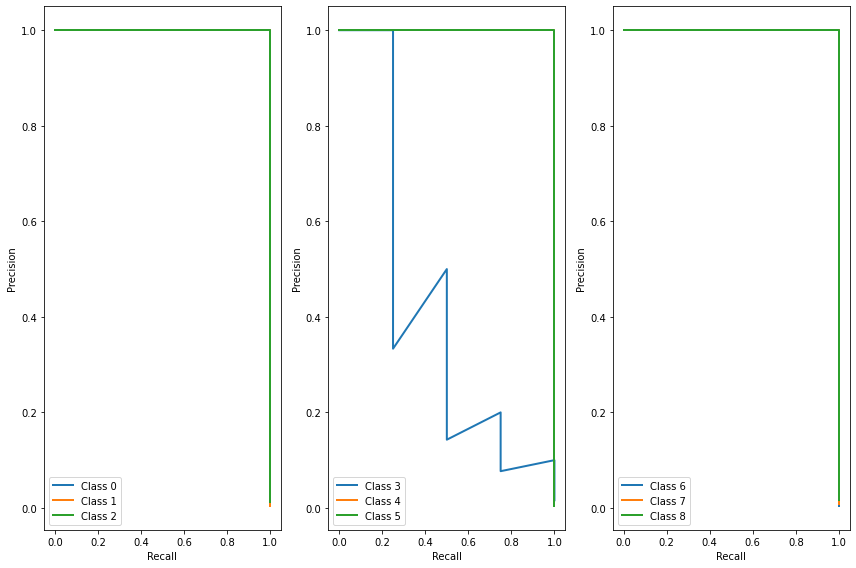

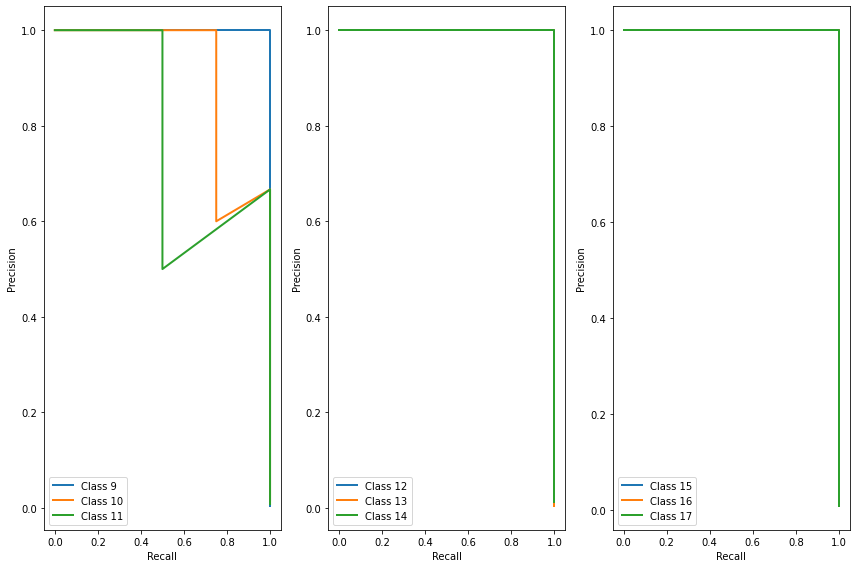

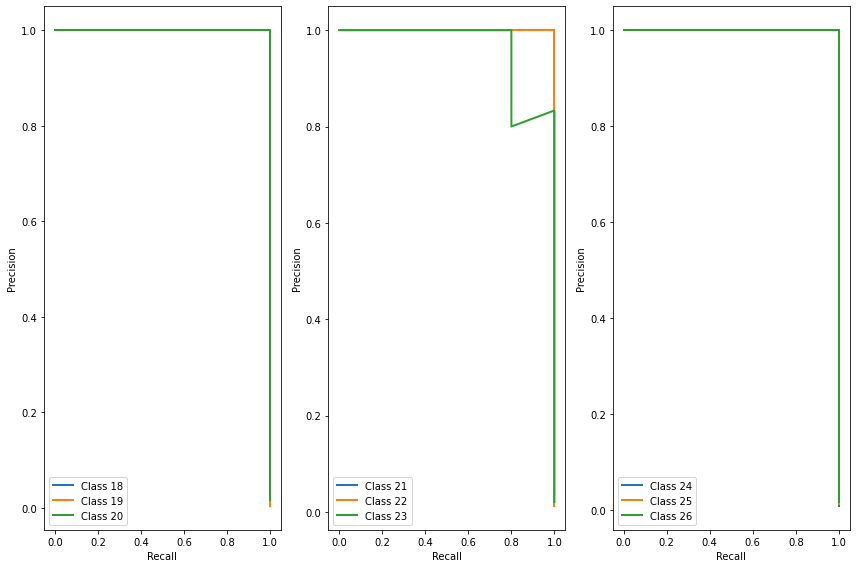

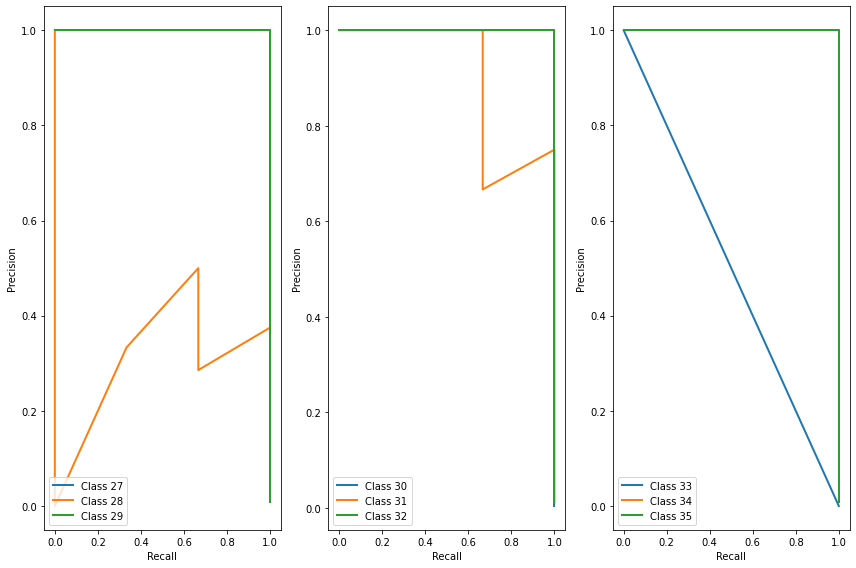

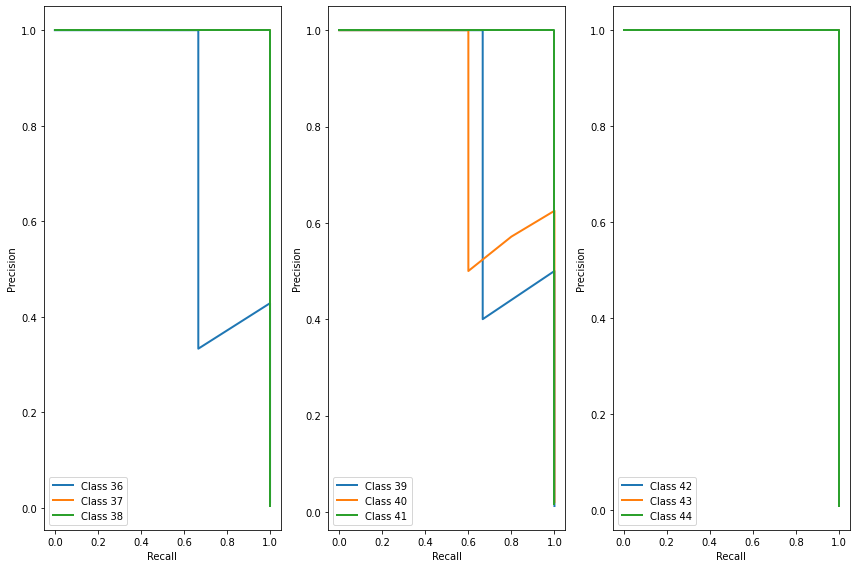

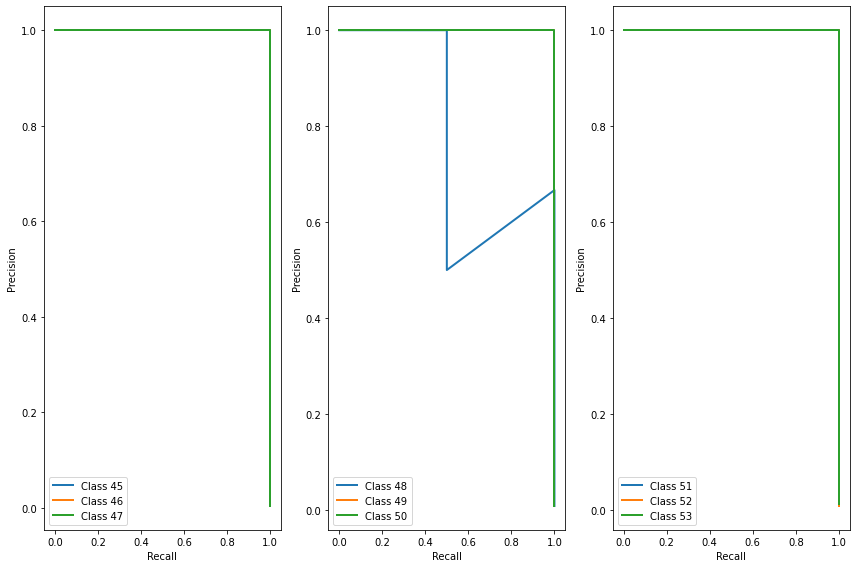

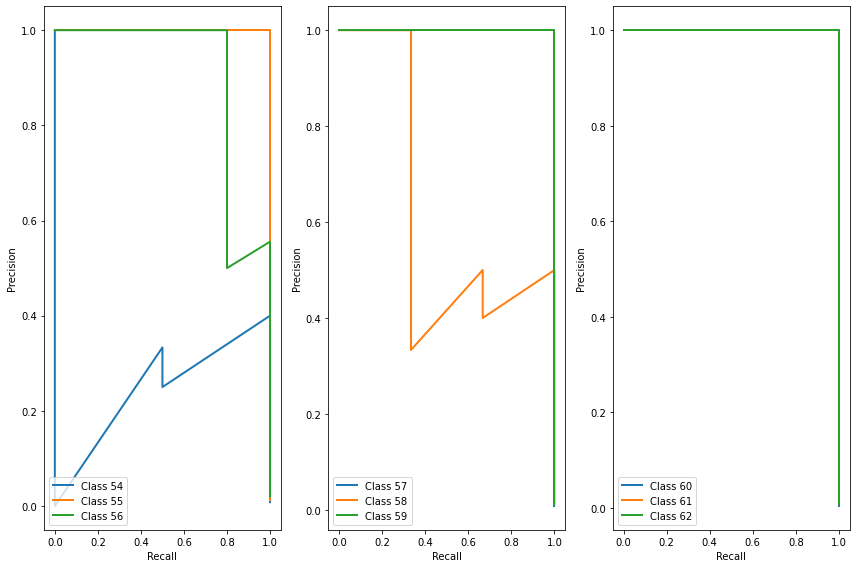

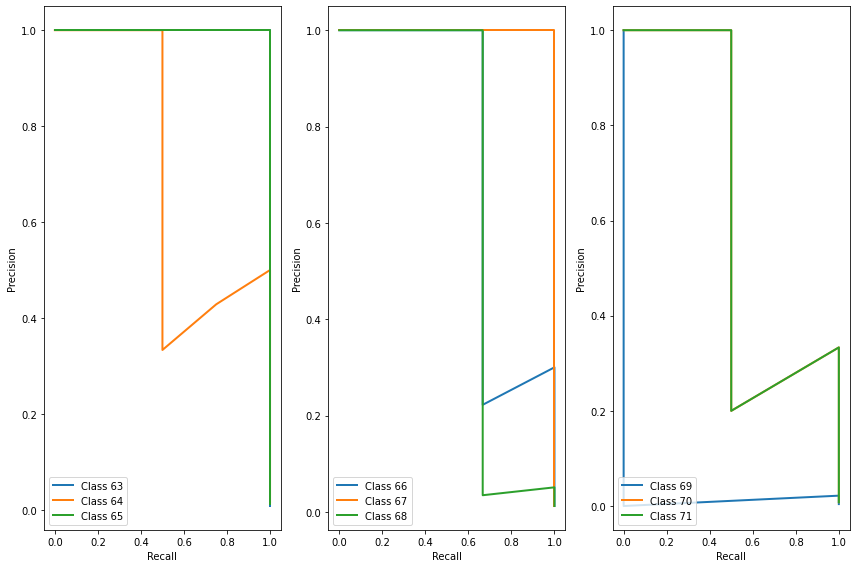

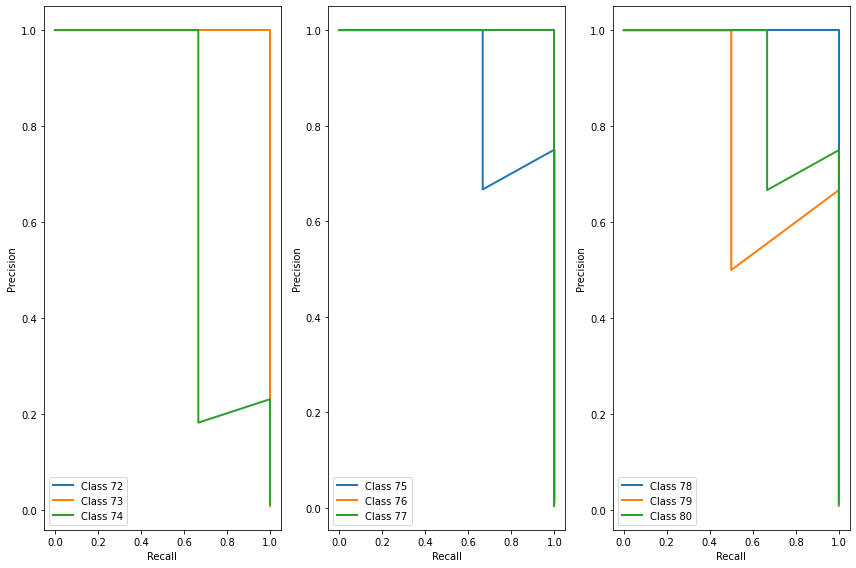

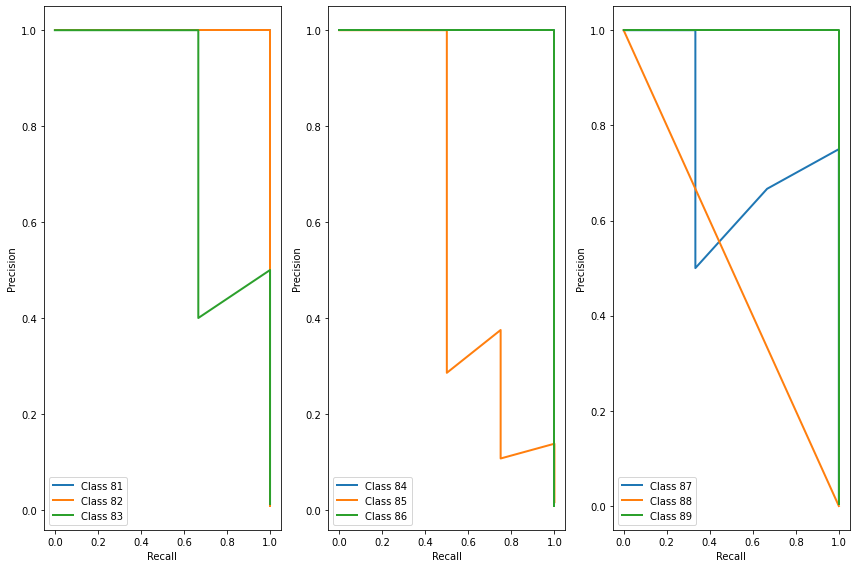

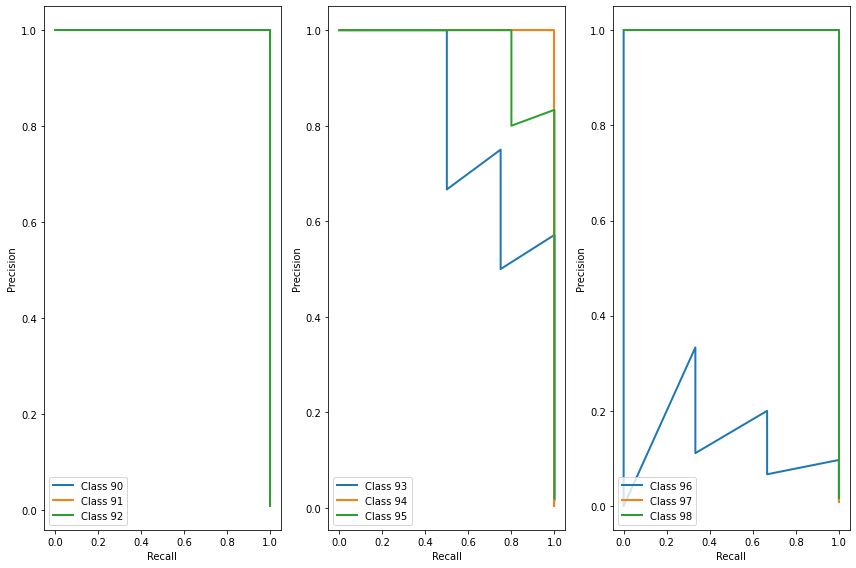

In [9]:
rec=dict()
pre=dict()
preSco=dict()
lw = 2
colsn=3
rowsn=11
k=0
for i in range(n_classes):
    pre[i],rec[i],_=precision_recall_curve(y_test[:,i],y_score[:,i])
print('Precision vs Recall by classes')
for i in range(rowsn):
    fg, ax = plt.subplots(nrows=1, ncols=colsn,figsize=(12,8))
    for j in range(colsn):
        q=i*colsn+j+k
        ax[j].set_xlabel('Recall')
        ax[j].set_ylabel('Precision')
        ax[j].plot(rec[q], pre[q], lw=lw,label='Class %s' % (q))
        ax[j].plot(rec[q+1],pre[q+1],lw=lw,label='Class %s' % ((q+1)))
        ax[j].plot(rec[q+2],pre[q+2],lw=lw,label='Class %s' % ((q+2)))
        ax[j].legend(loc="lower left", fontsize=10)
        k+=2
    plt.tight_layout()

In [10]:
test=pd.read_csv('test.csv')
test_ids=test.id
test=test.drop('id',axis=1)
test_preds = clf.predict_proba(test)
submission = pd.DataFrame(test_preds, columns=classes)
submission.insert(0,'id',test_ids)
submission.reset_index()
submission.to_csv('Submission.csv',index=False)
endTime=datetime.now()
TIME=endTime-startTime

The ROC and precision-recall multi-class curves leave a lot to be desired. Many of the curves are flat lines with complete precision, while others have jagged curves that don't quite make sense. Some classes lose precision at certain recall points but then regain that as recall increases.

Overall, this model is a good start but more indepth feature selection needs to take place. There are 3 sets of features that should be analyzed in their own sets and combined at the end.

In [11]:
print('TIME! %s' % TIME)

TIME! 0:00:16.559365
